# python-basic2
# いよいよ実践問題です　わからないところはグーグルなどで調べながら取り組みましょう！

## (No.1)  1 + 2 + ・・・・12345 = ? 

In [1]:
# 問題通り　全部足して　答えましょう　（1+12345)*12345/2 はダメ

def calc():
    count = 0
    for i in range(12345):
        count += i+1
        
    return count

print(calc())

76205685


## (No.2) 以下の配列をnumpy配列に変換し逆順で呼びだしましょう

In [ ]:
a = [10,20,30,40,50,60,70,80]

import numpy as np

def rev(a):
    
    return np.asarray(a)[::-1]

print(rev(a))

## (No.3)  2秒間隔で5回　'Hello n回目' と表示し、5回表示に掛かった時間を計測しましょう（本当に10秒で終わったか確認する）

In [ ]:
import time

start = time.time()
for i in range(5):
    print('Hello {}回目'.format(i+1))
    time.sleep(2)
    
end = time.time() - start

print(end)
    

## (No.4) じゃんけんゲームを作る1  キーボードでrock(グー）、paper(パー）、scissors(チョキ）を入力し、絶対勝てないじゃんけんゲームをまず作ってみましょう
## それ以外のワードを入れるとGAME OVER と表示しましょう

In [ ]:
user = input()

if user == 'rock':
    print('paper')
    print('YOU LOSE')
elif user == 'paper':
    print('scissors')
    print('YOU LOSE')
elif user == 'scissors':
    print('rock')
    print('YOU LOSE')
else:
    print('GAME OVER')
    

## (No.5) じゃんけんゲームを作る2  流石につまらないので ランダムに結果がでるようにして遊べるようにしましょう

In [ ]:
import random

#setting  random.choiceでも良さそう
dic = {0:'rock',1:'paper',2:'scissors'}
ran = random.randrange(3)
enemy = dic[ran]

#結果表示用
draw = 'DRAW'
win = 'You Win!!'
lose = 'You lose!!'

error = 'NO GAME'

#入力待ち
user = input()

#判定
if user == enemy:
    judge = draw
    
else:
    
    if user == 'rock':
        if enemy =='paper':
            judge = lose
        else:
            judge = win
    
    elif user == 'paper':
        if enemy == 'scissors':
            judge = lose
        else:
            judge = win
            
    elif user == 'scissors':
        if enemy == 'rock':
            judge = lose
        else:
            judge = win
    
    else:
        judge = error

#結果発表
print('YOU : %s'%user)
print('ENEMY : %s'%enemy)
print('RESULT : %s'%judge)

# お遊びはここまで　ここからはより実践的な課題にチャレンジしましょう

## (No.6) PIL形式で画像(deepcat.png)を呼び出して画像を表示する(cv2.imshow()は使用禁止)

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
#%matplotlib inline

img = Image.open('deepcat.png')

print(type(img))
plt.imshow(img)
plt.show()

## (No.7) OpenCV形式で画像(deepcat.png)を呼び出して画像を表示する(cv2.imshow()は使用禁止)

In [ ]:
import cv2
import matplotlib.pyplot as plt
#matplotlib inline

img = cv2.imread('deepcat.png')

print(type(img))
plt.imshow(img)
plt.show()


## (No.8) No.6(PIL)とNo.7(OpenCV)の違いは？
## その差を修正してみましょう　（No6の画像をNo7の画像と同等にする）

In [ ]:
#PIL(pillow)形式　は RGB , opencv形式は BGR なので
#cv2で取得した画像データをRGBフォーマットのモジュール(PILやmatplotlib で表示すると青みがかった画像になる)
#カメラで撮像(BGR) ⇒　kerasモデルで推論(RGB)の組み合わせは良くあるので要注意！（変換しましょう）

import cv2
import matplotlib.pyplot as plt
#matplotlib inline

img = cv2.imread('deepcat.png')
img = img[:,:,::-1] #img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(type(img))
plt.imshow(img)
plt.show()

## (No.9)　データセット作成  dataフォルダ(catsフォルダ:10枚、dogsフォルダ:10枚）からデータを吸い出し,128x128にリサイズし、X：画像データ、 Y：ラベルデータとなるnumpy 配列を作りましょう
## ヒント：後々Kerasで使うので　X.shape ⇒ (20,128,128,3)  Y.shape ⇒(20,)

#### keras.preprocessingを使うパターン

Using TensorFlow backend.
C:\Users\LP160_7\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\LP160_7\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\LP160_7\Anaconda3\envs\py36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\LP160_7\Anaconda3\envs\py36\lib\sit

(20, 128, 128, 3) (20,)


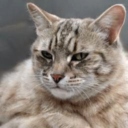

In [2]:
from keras.preprocessing.image import load_img, img_to_array,array_to_img
import glob
import numpy as np

#空の配列を用意
X=[]
Y=[]

#dataフォルダから各フォルダ名を取得
label = glob.glob('./data/*')

#各フォルダ内のデータを吸出し
for i in range(len(label)):
    f_list = glob.glob(label[i]+'/*')
    for f in f_list:
        img = img_to_array(load_img(f, target_size=(128,128),interpolation='bilinear'))#リサイズアルゴリズムも要注意！
        X.append(img)
        Y.append(i)
X = np.asarray(X)
Y = np.asarray(Y)

print(X.shape,Y.shape)
array_to_img(X[0])

#### opencvを使うパターン

(20, 128, 128, 3) (20,)


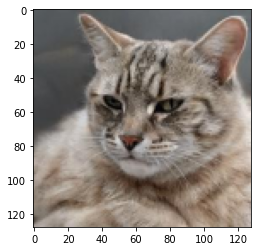

In [3]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
#空の配列を用意
X=[]
Y=[]

#dataフォルダから各フォルダ名を取得
label = glob.glob('./data/*')

#各フォルダ内のデータを吸出し
for i in range(len(label)):
    f_list = glob.glob(label[i]+'/*')
    for f in f_list:
        img = cv2.imread(f)
        img = cv2.resize(img,dsize=(128,128),interpolation=cv2.INTER_LINEAR)#リサイズアルゴリズムも要注意！
        img = img[:,:,::-1]  #img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        X.append(img)
        Y.append(i)
X = np.asarray(X)
Y = np.asarray(Y)

print(X.shape,Y.shape)
plt.imshow(X[0])
plt.show()

#### opencvを使うパターン  + 最初からnumpy配列で処理

(20, 128, 128, 3) (20,)


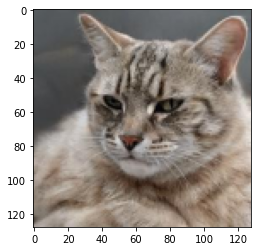

In [4]:
#最初からnumpyで吸い出そうのパターン
import cv2
import glob
import numpy as np

#dataフォルダから各フォルダ名を取得
label = glob.glob('./data/*')

def trans(img):
    img = cv2.imread(f)
    img = cv2.resize(img,dsize=(128,128),interpolation=cv2.INTER_LINEAR)
    img = img[np.newaxis,:,:,::-1]
    return img


flag = True
for i in range(len(label)):
    f_list = glob.glob(label[i]+'/*')
    for f in f_list:
        if flag:
            X = trans(f)
            flag = False
        else:
            img = trans(f)
            X = np.vstack((X,img))

print(X.shape,Y.shape)
plt.imshow(X[0])
plt.show()

## (No.10)　データセットの確認　正しく取得できたか全画像を縦4x横5サイズで表示してみましょう
## ついでにYの中身も見てみましょう

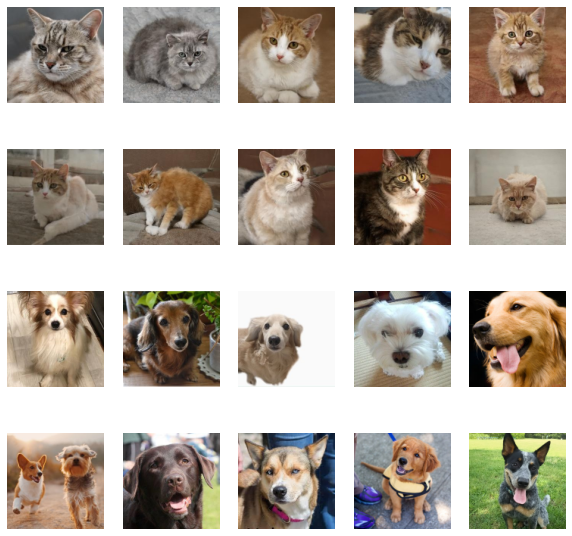

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def showpic(X,row,col):
    plt.figure(figsize=(10,10))

    n = 0
    while n < col * row :
        n += 1
        plt.subplot(col,row,n)
        try:
            plt.imshow(X[n-1])
        except:
            pass
        plt.axis('off')
    plt.show()

showpic(X,5,4)    
print(Y)

## (No11)　データセットX,Yを学習用データX_train,y_train   評価用データX_test, y_testに 7:3 の比率で分割し No10の様に表示して正しく分割されているか確認しましょう

(14, 128, 128, 3) (14,) (6, 128, 128, 3) (6,)
X_train image


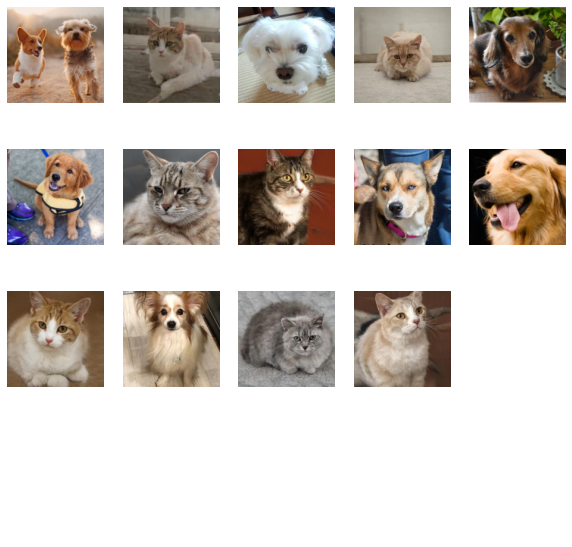

X_test image


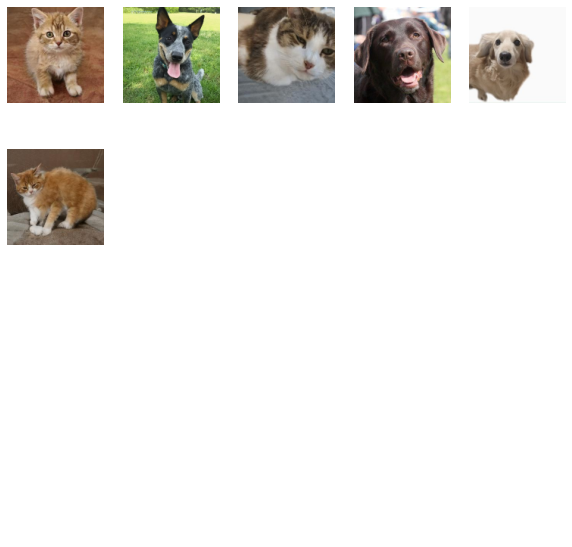

In [6]:
from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size = 0.3, random_state=42, stratify=Y)


#check
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
print('X_train image')
showpic(X_train,5,4)
print('X_test image')
showpic(X_test,5,4)

# ここからは物理PCやラズパイなどでやりましょう（Google Colabではカメラが非常に扱いにくいので）

## (No.12)  opencv + カメラ（WebカメラやPCのFrontカメラ）を使って動画を別window表示し、画像を撮像取得できるプログラムを作成する
## キーボードのsキーを押すと撮像して画像をファイル(ファイル名はtest.png)として保存、ESCキーを押すとプログラムを終了すること

In [3]:
import cv2
cap = cv2.VideoCapture(0)

while True:
    ret,img = cap.read()
    cv2.imshow('cap',img)
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord('s'):
        cv2.imwrite('test.png',img)
    elif key == 27:
        break
        
cv2.destroyAllWindows()

## (No.13)  No.12のレベルアップをしましょう
## 本日の日付フォルダを生成（例：20200520)し、その中に連番を付けてファイルを保存できるようにしてみましょう

In [ ]:
import cv2
import datetime
import os
cap = cv2.VideoCapture(0)

n = 0
while True:
    time = datetime.datetime.now()
    dir_name = '{0:%Y%m%d}'.format(time)
    os.makedirs(dir_name,exist_ok = True)
    
    ret,img = cap.read()
    cv2.imshow('cap',img)
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord('s'):
        cv2.imwrite(dir_name + '/{}.png'.format(n),img)
        n += 1
    elif key == 27:
        break
        
cv2.destroyAllWindows()

In [ ]:
import cv2
import os

import datetime

def save_frame_camera_key(device_num, dir_path, basename, ext='jpg', delay=1, window_name='frame'):
    
    cap = cv2.VideoCapture(device_num)
    
    if not cap.isOpened():
        return

    os.makedirs(dir_path, exist_ok=True)
    base_path = os.path.join(dir_path, basename)
    
    n = 0
    while True:
        ret, frame = cap.read()
        cv2.imshow(window_name, frame)
        key = cv2.waitKey(delay) & 0xFF
        
        if key == ord('c'):
            cv2.imwrite('{}_{}.{}'.format(base_path, n, ext), frame)
            
            n += 1
        elif key == ord('q'):
            break

    cv2.destroyWindow(window_name)

captime=datetime.datetime.now()
folderdate=('/{0:%Y%m%d}'.format(captime))
save_frame_camera_key(0, 'data/temp'+folderdate, 'camera_capture')


# お疲れ様でした！ Pythonの基礎、データセット作成、カメラ撮像までできるようになりましたね！　あとは機械学習だけ！

# QRコードよんでみよ

In [8]:
from pyzbar.pyzbar import decode
from PIL import Image

# 画像ファイルの指定
image = "./test.png"

# QRコードの読取り
img = Image.open(image)
data = decode(Image.open(image))

# コード内容を出力
print(data)

[]
